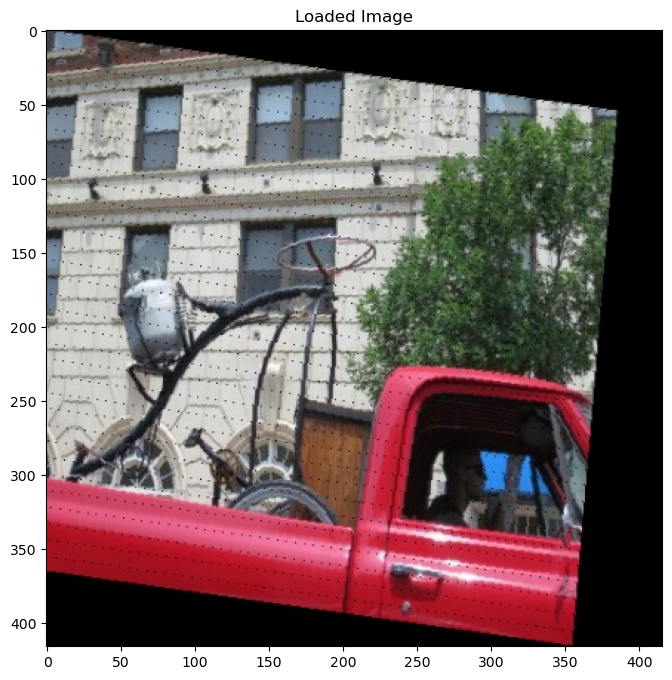

Text file content:
4 0.4785432448753944 0.7560096153846154 0.9570864897507888 0.4879807692307692



In [3]:
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt

# Define paths to the image and text file
image_path = "/Users/jaydenma/Documents/mathematical image analysis/mia final project/car_sample/images_augmented/0a56ee41a72480bc_jpg.rf.k0G8JC1qya6UiWGHtQK3_shear.jpg"
bb_path = "/Users/jaydenma/Documents/mathematical image analysis/mia final project/car_sample/images_augmented_labels/0a56ee41a72480bc_jpg.rf.k0G8JC1qya6UiWGHtQK3_shear.txt"

# Check if files exist
if not os.path.exists(image_path):
    print(f"Image file not found: {image_path}")
if not os.path.exists(bb_path):
    print(f"Text file not found: {bb_path}")

# Load and display the image
if os.path.exists(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.title("Loaded Image")
    plt.axis('on')
    plt.show()

# Read and print the content of the text file
if os.path.exists(bb_path):
    with open(bb_path, 'r') as f:
        bbox = f.read()
    print("Text file content:")
    print(bbox)

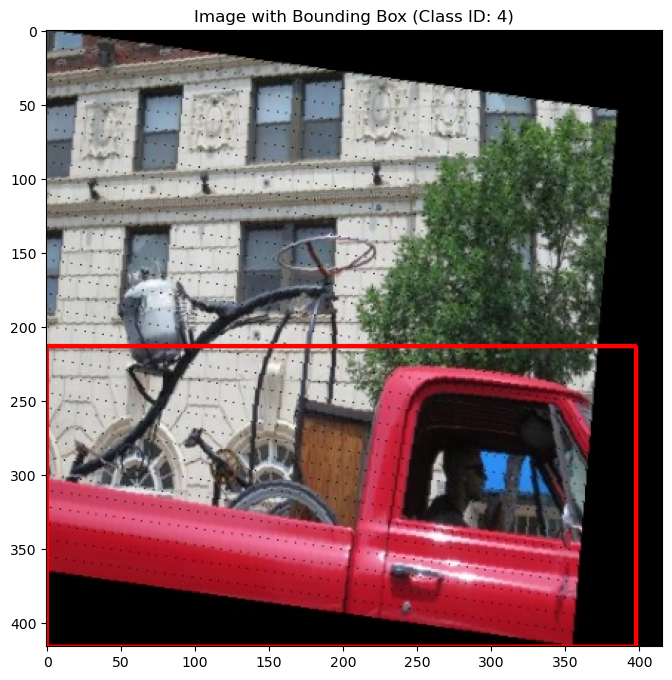

In [4]:
# Parse the bbox text
bbox_parts = bbox.strip().split()
class_id = int(bbox_parts[0])
x_center = float(bbox_parts[1])
y_center = float(bbox_parts[2])
width = float(bbox_parts[3])
height = float(bbox_parts[4])

# Get image dimensions
img_height, img_width = image.shape[:2]

# Convert YOLO format to pixel coordinates
x1 = int((x_center - width/2) * img_width)
y1 = int((y_center - height/2) * img_height)
x2 = int((x_center + width/2) * img_width)
y2 = int((y_center + height/2) * img_height)

# Make a copy of the image to draw on
img_with_bbox = image.copy()

# Draw the rectangle on the image
cv2.rectangle(img_with_bbox, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the image with the bounding box
plt.figure(figsize=(10, 8))
plt.imshow(img_with_bbox)
plt.title(f"Image with Bounding Box (Class ID: {class_id})")
plt.axis('on')
plt.show()